# Post-saturation tapering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
sys.path.append('/Users/riverr/Documents/pyfel1d/main/')
from particles import ParticleLoader
from fel import OneDFELSolver
import time

This notebook shows an example of post-saturation tapering.

# Simulation set up 

In [2]:
solver = OneDFELSolver(Lzhat=30, ## undulator length
                       Nzhat=1500, ## number of steps in undulator
                       time_independent=True) ## post-saturation tapering is fundamentally a time-independent effect, so we'll use this for quicker sims

In [3]:
# specify initial particle coordinates, we'll use the ParticleLoader class to do this with correct shot noise 

solver.generate_beam(bdes=1e-4)

# Run simulation and look at results

In [4]:
%%time
solver.run_simulation(steps_between_store = 10, ## store the field every 10 steps 
                      verbose=True, ## print status in 10% intervals 
                      store_particles=True)

Beam profile $\chi$ is unspecified, setting it to 1 for all zeta
Found no input harmonics array, assuming only first harmonic present
Found no input taper array, assuming it is zero everywhere
Input seed field $a_0$ is unspecified, setting it to zero
Beginning simulation including harmonics: [1]
0% done
10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
Done
CPU times: user 764 ms, sys: 3.04 s, total: 3.8 s
Wall time: 649 ms


Text(0, 0.5, 'Average power $|a|^2$')

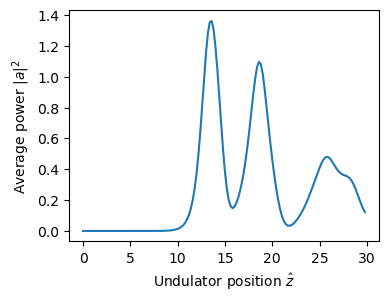

In [5]:
plt.figure(figsize=(4,3))
plt.plot(solver.zhat_store, np.abs(solver.a_store)**2)
#plt.yscale('log')
plt.xlabel(r'Undulator position $\hat{z}$')
plt.ylabel(r'Average power $|a|^2$')

In [6]:
a_store_no_taper = solver.a_store

# Run simulation and look at results

Text(0, 0.5, 'Normalized taper $\\Delta$')

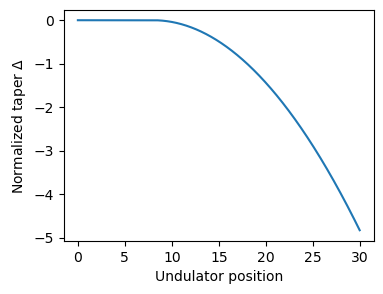

In [7]:
z0 = 8
solver.taper = -0.01*np.heaviside(solver.zhat_arr - z0, 0)*(solver.zhat_arr - z0)**2

plt.figure(figsize=(4,3))
plt.plot(solver.zhat_arr, solver.taper)
plt.xlabel('Undulator position')
plt.ylabel(r'Normalized taper $\Delta$')

In [8]:
%%time
solver.run_simulation(steps_between_store = 10, ## store the field every 10 steps 
                      verbose=True, ## print status in 10% intervals 
                      store_particles=True)

Beginning simulation including harmonics: [1]
0% done
10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
Done
CPU times: user 768 ms, sys: 2.99 s, total: 3.76 s
Wall time: 650 ms


Text(0, 0.5, 'Average power $|a|^2$')

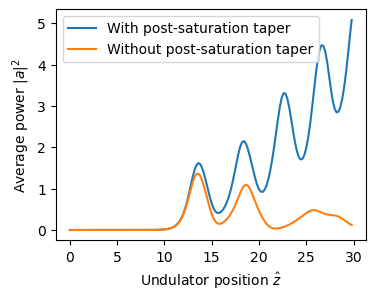

In [9]:
plt.figure(figsize=(4,3))
plt.plot(solver.zhat_store, np.abs(solver.a_store)**2, label=f'With post-saturation taper')
plt.plot(solver.zhat_store, np.abs(a_store_no_taper)**2, label=f'Without post-saturation taper')
#plt.yscale('log')
plt.legend()
plt.xlabel(r'Undulator position $\hat{z}$')
plt.ylabel(r'Average power $|a|^2$')

Text(0, 0.5, 'Energy offset $\\eta$')

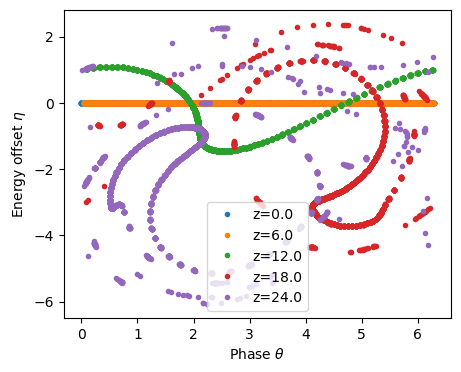

In [10]:
plt.figure(figsize=(5,4))
i_plots = np.linspace(0, len(solver.zhat_store), 5, endpoint=False).astype(int)
for i in i_plots:
    plt.plot(solver.theta_store[i]%(2*np.pi), solver.eta_store[i], '.', label=f'z={solver.zhat_store[i]:.1f}')
plt.legend()
plt.xlabel(r'Phase $\theta$')
plt.ylabel(r'Energy offset $\eta$')